In [3]:
from pylab import plt, mpl
plt.style.use('seaborn')
mpl.rcParams['font.family'] = 'serif'
% matplotlib inline
import seaborn as sns
sns.set(context='paper',
style='darkgrid',
rc={'figure.facecolor':'white'},
font_scale=1.2)

In [4]:
 # classify Reuters newswires into 
 # 46 mutually exclusive topics. Because you have many classes, 
 # this problem is an instance of multiclass classification; and 
 # because each data point should be classified into only one category, 
 # the problem is more specifically an instance of single-label, multiclass classification. If each data point could 
 # belong to multiple categories (in this case, topics), you’d be facing a multilabel, multiclass classification problem.

In [5]:
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
    num_words=10000)

In [6]:
print(train_data.shape, test_data.shape)

(8982,) (2246,)


In [7]:
# each example is a list of integers (word indices):
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

In [8]:
# decode newswires back to text
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in
    train_data[0]])      

In [9]:
decoded_newswire

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [10]:
 # label associated is integer
 # between 0 and 45 -topic index
 train_labels[10]

3

In [11]:
# Prepare data
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)  
x_test  = vectorize_sequences(test_data)  

In [12]:
# prepare labels
# def to_one_hot(labels, dimension=46):
#     results = np.zeros((len(labels), dimension))
#     for i, label in enumerate(labels):
#         results[i, label] = 1.
#     return results
# 
# one_hot_train_labels = to_one_hot(train_labels)
# one_hot_test_labels = to_one_hot(test_labels)

from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [14]:
# the number of output classes has 
# gone from imdb 2 to reuters 46. 
# The dimensionality of the 
# output space is much larger.

# since there are 46 dimensions increase the hidden layers to 64
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
# for each input sample, the network will output a 46-dimensional 
# vector. Each entry in this vector (each dimension) will 
# encode a different output class.
# softmax activation  will output a probability distribution 
# over the 46 different output classes—for every input sample, 
# the network will produce a 46-dimensional output vector, 
# where output[i] is the probability that the sample belongs 
# to class i. The 46 scores will sum to 1.
model.add(layers.Dense(46, activation='softmax'))

In [15]:
# Compiling the model
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [16]:
# validating the approach
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [17]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20


 512/7982 [>.............................] - ETA: 9s - loss: 3.8087 - acc: 0.0410

1024/7982 [==>...........................] - ETA: 4s - loss: 3.7016 - acc: 0.2119

1536/7982 [====>.........................] - ETA: 3s - loss: 3.5679 - acc: 0.2591

2048/7982 [======>.......................] - ETA: 2s - loss: 3.4412 - acc: 0.3096

2560/7982 [========>.....................] - ETA: 2s - loss: 3.3136 - acc: 0.3328

3072/7982 [==========>...................] - ETA: 1s - loss: 3.1998 - acc: 0.3561

3584/7982 [============>.................] - ETA: 1s - loss: 3.1010 - acc: 0.3719

4096/7982 [==============>...............] - ETA: 1s - loss: 3.0066 - acc: 0.3875

4608/7982 [================>.............] - ETA: 0s - loss: 2.9223 - acc: 0.4000

5120/7982 [==================>...........] - ETA: 0s - loss: 2.8345 - acc: 0.4193

5632/7982 [====================>.........] - ETA: 0s - loss: 2.7734 - acc: 0.4279

6144/7982 [======================>.......] - ETA: 0s - loss: 2.6996 - acc: 0.4487

6656/7982 [========================>.....] - ETA: 0s - loss: 2.6333 - acc: 0.4633

7168/7982 [=========================>....] - ETA: 0s - loss: 2.5792 - acc: 0.4743

7680/7982 [===========================>..] - ETA: 0s - loss: 2.5254 - acc: 0.4857

7982/7982 [==============================] - 2s 249us/step - loss: 2.4913 - acc: 0.4927 - val_loss: 1.6736 - val_acc: 0.6450


Epoch 2/20


 512/7982 [>.............................] - ETA: 1s - loss: 1.5505 - acc: 0.6719

1024/7982 [==>...........................] - ETA: 1s - loss: 1.5016 - acc: 0.6934

1536/7982 [====>.........................] - ETA: 0s - loss: 1.5043 - acc: 0.6908

2048/7982 [======>.......................] - ETA: 0s - loss: 1.4816 - acc: 0.6934

2560/7982 [========>.....................] - ETA: 0s - loss: 1.4951 - acc: 0.6895

3072/7982 [==========>...................] - ETA: 0s - loss: 1.4897 - acc: 0.6914

3584/7982 [============>.................] - ETA: 0s - loss: 1.4849 - acc: 0.6908

4096/7982 [==============>...............] - ETA: 0s - loss: 1.4679 - acc: 0.6926

4608/7982 [================>.............] - ETA: 0s - loss: 1.4631 - acc: 0.6927

5120/7982 [==================>...........] - ETA: 0s - loss: 1.4557 - acc: 0.6945

5632/7982 [====================>.........] - ETA: 0s - loss: 1.4369 - acc: 0.6982

6144/7982 [======================>.......] - ETA: 0s - loss: 1.4355 - acc: 0.6978

6656/7982 [========================>.....] - ETA: 0s - loss: 1.4224 - acc: 0.6994

7168/7982 [=========================>....] - ETA: 0s - loss: 1.4067 - acc: 0.7021

7680/7982 [===========================>..] - ETA: 0s - loss: 1.3844 - acc: 0.7061

7982/7982 [==============================] - 1s 156us/step - loss: 1.3847 - acc: 0.7062 - val_loss: 1.2740 - val_acc: 0.7210


Epoch 3/20


 512/7982 [>.............................] - ETA: 1s - loss: 1.0182 - acc: 0.7676

1024/7982 [==>...........................] - ETA: 0s - loss: 1.0498 - acc: 0.7666

1536/7982 [====>.........................] - ETA: 0s - loss: 1.0656 - acc: 0.7650

2048/7982 [======>.......................] - ETA: 0s - loss: 1.0755 - acc: 0.7607

2560/7982 [========>.....................] - ETA: 0s - loss: 1.0919 - acc: 0.7566

3072/7982 [==========>...................] - ETA: 0s - loss: 1.0840 - acc: 0.7601

3584/7982 [============>.................] - ETA: 0s - loss: 1.0891 - acc: 0.7617

4096/7982 [==============>...............] - ETA: 0s - loss: 1.0835 - acc: 0.7651

4608/7982 [================>.............] - ETA: 0s - loss: 1.0809 - acc: 0.7648

5120/7982 [==================>...........] - ETA: 0s - loss: 1.0729 - acc: 0.7668

5632/7982 [====================>.........] - ETA: 0s - loss: 1.0642 - acc: 0.7683

6144/7982 [======================>.......] - ETA: 0s - loss: 1.0633 - acc: 0.7694

6656/7982 [========================>.....] - ETA: 0s - loss: 1.0618 - acc: 0.7683

7168/7982 [=========================>....] - ETA: 0s - loss: 1.0502 - acc: 0.7705

7680/7982 [===========================>..] - ETA: 0s - loss: 1.0456 - acc: 0.7721

7982/7982 [==============================] - 1s 152us/step - loss: 1.0434 - acc: 0.7720 - val_loss: 1.1147 - val_acc: 0.7630


Epoch 4/20


 512/7982 [>.............................] - ETA: 1s - loss: 0.7728 - acc: 0.8320

1024/7982 [==>...........................] - ETA: 0s - loss: 0.8542 - acc: 0.8076

1536/7982 [====>.........................] - ETA: 0s - loss: 0.8141 - acc: 0.8223

2048/7982 [======>.......................] - ETA: 0s - loss: 0.8171 - acc: 0.8203

2560/7982 [========>.....................] - ETA: 0s - loss: 0.8197 - acc: 0.8238

3072/7982 [==========>...................] - ETA: 0s - loss: 0.8250 - acc: 0.8255

3584/7982 [============>.................] - ETA: 0s - loss: 0.8288 - acc: 0.8259

4096/7982 [==============>...............] - ETA: 0s - loss: 0.8268 - acc: 0.8267

4608/7982 [================>.............] - ETA: 0s - loss: 0.8287 - acc: 0.8262

5120/7982 [==================>...........] - ETA: 0s - loss: 0.8310 - acc: 0.8275

5632/7982 [====================>.........] - ETA: 0s - loss: 0.8311 - acc: 0.8281

6144/7982 [======================>.......] - ETA: 0s - loss: 0.8289 - acc: 0.8298

6656/7982 [========================>.....] - ETA: 0s - loss: 0.8248 - acc: 0.8299

7168/7982 [=========================>....] - ETA: 0s - loss: 0.8317 - acc: 0.8277

7680/7982 [===========================>..] - ETA: 0s - loss: 0.8277 - acc: 0.8281

7982/7982 [==============================] - 1s 154us/step - loss: 0.8208 - acc: 0.8297 - val_loss: 1.0214 - val_acc: 0.7760


Epoch 5/20


 512/7982 [>.............................] - ETA: 1s - loss: 0.7169 - acc: 0.8496

1024/7982 [==>...........................] - ETA: 0s - loss: 0.6387 - acc: 0.8711

1536/7982 [====>.........................] - ETA: 0s - loss: 0.6519 - acc: 0.8678

2048/7982 [======>.......................] - ETA: 0s - loss: 0.6482 - acc: 0.8638

2560/7982 [========>.....................] - ETA: 0s - loss: 0.6595 - acc: 0.8625

3072/7982 [==========>...................] - ETA: 0s - loss: 0.6530 - acc: 0.8659

3584/7982 [============>.................] - ETA: 0s - loss: 0.6637 - acc: 0.8638

4096/7982 [==============>...............] - ETA: 0s - loss: 0.6641 - acc: 0.8635

4608/7982 [================>.............] - ETA: 0s - loss: 0.6700 - acc: 0.8628

5120/7982 [==================>...........] - ETA: 0s - loss: 0.6756 - acc: 0.8615

5632/7982 [====================>.........] - ETA: 0s - loss: 0.6732 - acc: 0.8629

6144/7982 [======================>.......] - ETA: 0s - loss: 0.6615 - acc: 0.8659

6656/7982 [========================>.....] - ETA: 0s - loss: 0.6619 - acc: 0.8648

7168/7982 [=========================>....] - ETA: 0s - loss: 0.6608 - acc: 0.8641

7680/7982 [===========================>..] - ETA: 0s - loss: 0.6574 - acc: 0.8658

7982/7982 [==============================] - 1s 151us/step - loss: 0.6575 - acc: 0.8644 - val_loss: 0.9683 - val_acc: 0.7970


Epoch 6/20


 512/7982 [>.............................] - ETA: 1s - loss: 0.6214 - acc: 0.8848

1024/7982 [==>...........................] - ETA: 0s - loss: 0.5479 - acc: 0.8994

1536/7982 [====>.........................] - ETA: 0s - loss: 0.5466 - acc: 0.8945

2048/7982 [======>.......................] - ETA: 0s - loss: 0.5378 - acc: 0.8960

2560/7982 [========>.....................] - ETA: 0s - loss: 0.5373 - acc: 0.8965

3072/7982 [==========>...................] - ETA: 0s - loss: 0.5308 - acc: 0.8945

3584/7982 [============>.................] - ETA: 0s - loss: 0.5205 - acc: 0.8962

4096/7982 [==============>...............] - ETA: 0s - loss: 0.5219 - acc: 0.8940

4608/7982 [================>.............] - ETA: 0s - loss: 0.5227 - acc: 0.8928

5120/7982 [==================>...........] - ETA: 0s - loss: 0.5218 - acc: 0.8930

5632/7982 [====================>.........] - ETA: 0s - loss: 0.5232 - acc: 0.8944

6144/7982 [======================>.......] - ETA: 0s - loss: 0.5288 - acc: 0.8921

6656/7982 [========================>.....] - ETA: 0s - loss: 0.5281 - acc: 0.8914

7168/7982 [=========================>....] - ETA: 0s - loss: 0.5239 - acc: 0.8919

7680/7982 [===========================>..] - ETA: 0s - loss: 0.5217 - acc: 0.8930

7982/7982 [==============================] - 1s 151us/step - loss: 0.5238 - acc: 0.8926 - val_loss: 0.9200 - val_acc: 0.8100


Epoch 7/20


 512/7982 [>.............................] - ETA: 1s - loss: 0.4251 - acc: 0.9180

1024/7982 [==>...........................] - ETA: 0s - loss: 0.4156 - acc: 0.9150

1536/7982 [====>.........................] - ETA: 0s - loss: 0.4117 - acc: 0.9173

2048/7982 [======>.......................] - ETA: 0s - loss: 0.4135 - acc: 0.9141

2560/7982 [========>.....................] - ETA: 0s - loss: 0.4123 - acc: 0.9156

3072/7982 [==========>...................] - ETA: 0s - loss: 0.4172 - acc: 0.9128

3584/7982 [============>.................] - ETA: 0s - loss: 0.4285 - acc: 0.9107

4096/7982 [==============>...............] - ETA: 0s - loss: 0.4400 - acc: 0.9116

4608/7982 [================>.............] - ETA: 0s - loss: 0.4368 - acc: 0.9123

5120/7982 [==================>...........] - ETA: 0s - loss: 0.4338 - acc: 0.9127

5632/7982 [====================>.........] - ETA: 0s - loss: 0.4354 - acc: 0.9128

6144/7982 [======================>.......] - ETA: 0s - loss: 0.4344 - acc: 0.9124

6656/7982 [========================>.....] - ETA: 0s - loss: 0.4291 - acc: 0.9118

7168/7982 [=========================>....] - ETA: 0s - loss: 0.4237 - acc: 0.9132

7680/7982 [===========================>..] - ETA: 0s - loss: 0.4280 - acc: 0.9122

7982/7982 [==============================] - 1s 150us/step - loss: 0.4277 - acc: 0.9117 - val_loss: 0.9100 - val_acc: 0.8060


Epoch 8/20


 512/7982 [>.............................] - ETA: 1s - loss: 0.3120 - acc: 0.9453

1024/7982 [==>...........................] - ETA: 1s - loss: 0.3603 - acc: 0.9365

1536/7982 [====>.........................] - ETA: 0s - loss: 0.3624 - acc: 0.9336

2048/7982 [======>.......................] - ETA: 0s - loss: 0.3590 - acc: 0.9321

2560/7982 [========>.....................] - ETA: 0s - loss: 0.3459 - acc: 0.9348

3072/7982 [==========>...................] - ETA: 0s - loss: 0.3519 - acc: 0.9313

3584/7982 [============>.................] - ETA: 0s - loss: 0.3551 - acc: 0.9297

4096/7982 [==============>...............] - ETA: 0s - loss: 0.3544 - acc: 0.9292

4608/7982 [================>.............] - ETA: 0s - loss: 0.3483 - acc: 0.9290

5120/7982 [==================>...........] - ETA: 0s - loss: 0.3471 - acc: 0.9287

5632/7982 [====================>.........] - ETA: 0s - loss: 0.3503 - acc: 0.9281

6144/7982 [======================>.......] - ETA: 0s - loss: 0.3541 - acc: 0.9268

6656/7982 [========================>.....] - ETA: 0s - loss: 0.3494 - acc: 0.9282

7168/7982 [=========================>....] - ETA: 0s - loss: 0.3483 - acc: 0.9282

7680/7982 [===========================>..] - ETA: 0s - loss: 0.3485 - acc: 0.9276

7982/7982 [==============================] - 1s 153us/step - loss: 0.3489 - acc: 0.9273 - val_loss: 0.8943 - val_acc: 0.8150


Epoch 9/20


 512/7982 [>.............................] - ETA: 1s - loss: 0.2796 - acc: 0.9395

1024/7982 [==>...........................] - ETA: 0s - loss: 0.3020 - acc: 0.9248

1536/7982 [====>.........................] - ETA: 0s - loss: 0.2812 - acc: 0.9342

2048/7982 [======>.......................] - ETA: 0s - loss: 0.2874 - acc: 0.9312

2560/7982 [========>.....................] - ETA: 0s - loss: 0.2829 - acc: 0.9352

3072/7982 [==========>...................] - ETA: 0s - loss: 0.2866 - acc: 0.9346

3584/7982 [============>.................] - ETA: 0s - loss: 0.2969 - acc: 0.9328

4096/7982 [==============>...............] - ETA: 0s - loss: 0.2934 - acc: 0.9343

4608/7982 [================>.............] - ETA: 0s - loss: 0.2902 - acc: 0.9366

5120/7982 [==================>...........] - ETA: 0s - loss: 0.2881 - acc: 0.9383

5632/7982 [====================>.........] - ETA: 0s - loss: 0.2881 - acc: 0.9382

6144/7982 [======================>.......] - ETA: 0s - loss: 0.2836 - acc: 0.9396

6656/7982 [========================>.....] - ETA: 0s - loss: 0.2874 - acc: 0.9389

7168/7982 [=========================>....] - ETA: 0s - loss: 0.2834 - acc: 0.9393

7680/7982 [===========================>..] - ETA: 0s - loss: 0.2855 - acc: 0.9392

7982/7982 [==============================] - 1s 150us/step - loss: 0.2886 - acc: 0.9386 - val_loss: 0.9131 - val_acc: 0.8070


Epoch 10/20


 512/7982 [>.............................] - ETA: 1s - loss: 0.2253 - acc: 0.9570

1024/7982 [==>...........................] - ETA: 0s - loss: 0.2213 - acc: 0.9541

1536/7982 [====>.........................] - ETA: 0s - loss: 0.2228 - acc: 0.9544

2048/7982 [======>.......................] - ETA: 0s - loss: 0.2286 - acc: 0.9517

2560/7982 [========>.....................] - ETA: 0s - loss: 0.2280 - acc: 0.9523

3072/7982 [==========>...................] - ETA: 0s - loss: 0.2325 - acc: 0.9512

3584/7982 [============>.................] - ETA: 0s - loss: 0.2370 - acc: 0.9495

4096/7982 [==============>...............] - ETA: 0s - loss: 0.2375 - acc: 0.9492

4608/7982 [================>.............] - ETA: 0s - loss: 0.2400 - acc: 0.9477

5120/7982 [==================>...........] - ETA: 0s - loss: 0.2384 - acc: 0.9471

5632/7982 [====================>.........] - ETA: 0s - loss: 0.2424 - acc: 0.9458

6144/7982 [======================>.......] - ETA: 0s - loss: 0.2396 - acc: 0.9466

6656/7982 [========================>.....] - ETA: 0s - loss: 0.2453 - acc: 0.9447

7168/7982 [=========================>....] - ETA: 0s - loss: 0.2458 - acc: 0.9452

7680/7982 [===========================>..] - ETA: 0s - loss: 0.2456 - acc: 0.9449

7982/7982 [==============================] - 1s 152us/step - loss: 0.2444 - acc: 0.9451 - val_loss: 0.9122 - val_acc: 0.8120


Epoch 11/20


 512/7982 [>.............................] - ETA: 1s - loss: 0.2132 - acc: 0.9531

1024/7982 [==>...........................] - ETA: 0s - loss: 0.2025 - acc: 0.9570

1536/7982 [====>.........................] - ETA: 0s - loss: 0.1921 - acc: 0.9557

2048/7982 [======>.......................] - ETA: 0s - loss: 0.1922 - acc: 0.9570

2560/7982 [========>.....................] - ETA: 0s - loss: 0.1887 - acc: 0.9578

3072/7982 [==========>...................] - ETA: 0s - loss: 0.1938 - acc: 0.9567

3584/7982 [============>.................] - ETA: 0s - loss: 0.1974 - acc: 0.9554

4096/7982 [==============>...............] - ETA: 0s - loss: 0.1998 - acc: 0.9546

4608/7982 [================>.............] - ETA: 0s - loss: 0.2008 - acc: 0.9538

5120/7982 [==================>...........] - ETA: 0s - loss: 0.2002 - acc: 0.9531

5632/7982 [====================>.........] - ETA: 0s - loss: 0.2018 - acc: 0.9517

6144/7982 [======================>.......] - ETA: 0s - loss: 0.2050 - acc: 0.9508

6656/7982 [========================>.....] - ETA: 0s - loss: 0.2074 - acc: 0.9503

7168/7982 [=========================>....] - ETA: 0s - loss: 0.2088 - acc: 0.9491

7680/7982 [===========================>..] - ETA: 0s - loss: 0.2096 - acc: 0.9493

7982/7982 [==============================] - 1s 151us/step - loss: 0.2096 - acc: 0.9486 - val_loss: 0.9513 - val_acc: 0.8130


Epoch 12/20


 512/7982 [>.............................] - ETA: 1s - loss: 0.1966 - acc: 0.9609

1024/7982 [==>...........................] - ETA: 1s - loss: 0.1785 - acc: 0.9600

1536/7982 [====>.........................] - ETA: 0s - loss: 0.1841 - acc: 0.9577

2048/7982 [======>.......................] - ETA: 0s - loss: 0.1726 - acc: 0.9614

2560/7982 [========>.....................] - ETA: 0s - loss: 0.1705 - acc: 0.9613

3072/7982 [==========>...................] - ETA: 0s - loss: 0.1724 - acc: 0.9593

3584/7982 [============>.................] - ETA: 0s - loss: 0.1742 - acc: 0.9584

4096/7982 [==============>...............] - ETA: 0s - loss: 0.1776 - acc: 0.9565

4608/7982 [================>.............] - ETA: 0s - loss: 0.1823 - acc: 0.9536

5120/7982 [==================>...........] - ETA: 0s - loss: 0.1825 - acc: 0.9537

5632/7982 [====================>.........] - ETA: 0s - loss: 0.1845 - acc: 0.9537

6144/7982 [======================>.......] - ETA: 0s - loss: 0.1839 - acc: 0.9539

6656/7982 [========================>.....] - ETA: 0s - loss: 0.1859 - acc: 0.9533

7168/7982 [=========================>....] - ETA: 0s - loss: 0.1871 - acc: 0.9524

7680/7982 [===========================>..] - ETA: 0s - loss: 0.1866 - acc: 0.9526

7982/7982 [==============================] - 1s 153us/step - loss: 0.1874 - acc: 0.9524 - val_loss: 0.9635 - val_acc: 0.8020


Epoch 13/20


 512/7982 [>.............................] - ETA: 1s - loss: 0.1678 - acc: 0.9473

1024/7982 [==>...........................] - ETA: 0s - loss: 0.1489 - acc: 0.9502

1536/7982 [====>.........................] - ETA: 0s - loss: 0.1432 - acc: 0.9544

2048/7982 [======>.......................] - ETA: 0s - loss: 0.1491 - acc: 0.9541

2560/7982 [========>.....................] - ETA: 0s - loss: 0.1500 - acc: 0.9539

3072/7982 [==========>...................] - ETA: 0s - loss: 0.1494 - acc: 0.9548

3584/7982 [============>.................] - ETA: 0s - loss: 0.1495 - acc: 0.9545

4096/7982 [==============>...............] - ETA: 0s - loss: 0.1531 - acc: 0.9546

4608/7982 [================>.............] - ETA: 0s - loss: 0.1498 - acc: 0.9557

5120/7982 [==================>...........] - ETA: 0s - loss: 0.1520 - acc: 0.9543

5632/7982 [====================>.........] - ETA: 0s - loss: 0.1537 - acc: 0.9545

6144/7982 [======================>.......] - ETA: 0s - loss: 0.1559 - acc: 0.9543

6656/7982 [========================>.....] - ETA: 0s - loss: 0.1587 - acc: 0.9540

7168/7982 [=========================>....] - ETA: 0s - loss: 0.1635 - acc: 0.9530

7680/7982 [===========================>..] - ETA: 0s - loss: 0.1654 - acc: 0.9523

7982/7982 [==============================] - 1s 152us/step - loss: 0.1656 - acc: 0.9524 - val_loss: 0.9972 - val_acc: 0.7970


Epoch 14/20


 512/7982 [>.............................] - ETA: 1s - loss: 0.1049 - acc: 0.9766

1024/7982 [==>...........................] - ETA: 0s - loss: 0.1211 - acc: 0.9707

1536/7982 [====>.........................] - ETA: 0s - loss: 0.1423 - acc: 0.9642

2048/7982 [======>.......................] - ETA: 0s - loss: 0.1296 - acc: 0.9678

2560/7982 [========>.....................] - ETA: 0s - loss: 0.1273 - acc: 0.9668

3072/7982 [==========>...................] - ETA: 0s - loss: 0.1394 - acc: 0.9609

3584/7982 [============>.................] - ETA: 0s - loss: 0.1420 - acc: 0.9595

4096/7982 [==============>...............] - ETA: 0s - loss: 0.1387 - acc: 0.9597

4608/7982 [================>.............] - ETA: 0s - loss: 0.1393 - acc: 0.9594

5120/7982 [==================>...........] - ETA: 0s - loss: 0.1419 - acc: 0.9596

5632/7982 [====================>.........] - ETA: 0s - loss: 0.1456 - acc: 0.9579

6144/7982 [======================>.......] - ETA: 0s - loss: 0.1481 - acc: 0.9570

6656/7982 [========================>.....] - ETA: 0s - loss: 0.1500 - acc: 0.9555

7168/7982 [=========================>....] - ETA: 0s - loss: 0.1524 - acc: 0.9545

7680/7982 [===========================>..] - ETA: 0s - loss: 0.1530 - acc: 0.9547

7982/7982 [==============================] - 1s 152us/step - loss: 0.1531 - acc: 0.9545 - val_loss: 0.9779 - val_acc: 0.8060


Epoch 15/20


 512/7982 [>.............................] - ETA: 1s - loss: 0.1240 - acc: 0.9648

1024/7982 [==>...........................] - ETA: 0s - loss: 0.1246 - acc: 0.9619

1536/7982 [====>.........................] - ETA: 0s - loss: 0.1140 - acc: 0.9668

2048/7982 [======>.......................] - ETA: 0s - loss: 0.1173 - acc: 0.9639

2560/7982 [========>.....................] - ETA: 0s - loss: 0.1166 - acc: 0.9621

3072/7982 [==========>...................] - ETA: 0s - loss: 0.1181 - acc: 0.9606

3584/7982 [============>.................] - ETA: 0s - loss: 0.1253 - acc: 0.9584

4096/7982 [==============>...............] - ETA: 0s - loss: 0.1326 - acc: 0.9573

4608/7982 [================>.............] - ETA: 0s - loss: 0.1342 - acc: 0.9572

5120/7982 [==================>...........] - ETA: 0s - loss: 0.1326 - acc: 0.9568

5632/7982 [====================>.........] - ETA: 0s - loss: 0.1319 - acc: 0.9577

6144/7982 [======================>.......] - ETA: 0s - loss: 0.1312 - acc: 0.9580

6656/7982 [========================>.....] - ETA: 0s - loss: 0.1364 - acc: 0.9569

7168/7982 [=========================>....] - ETA: 0s - loss: 0.1416 - acc: 0.9554

7680/7982 [===========================>..] - ETA: 0s - loss: 0.1452 - acc: 0.9547

7982/7982 [==============================] - 1s 151us/step - loss: 0.1452 - acc: 0.9549 - val_loss: 1.0212 - val_acc: 0.7970


Epoch 16/20


 512/7982 [>.............................] - ETA: 1s - loss: 0.1327 - acc: 0.9629

1024/7982 [==>...........................] - ETA: 0s - loss: 0.1173 - acc: 0.9658

1536/7982 [====>.........................] - ETA: 0s - loss: 0.1163 - acc: 0.9629

2048/7982 [======>.......................] - ETA: 0s - loss: 0.1161 - acc: 0.9639

2560/7982 [========>.....................] - ETA: 0s - loss: 0.1190 - acc: 0.9617

3072/7982 [==========>...................] - ETA: 0s - loss: 0.1162 - acc: 0.9629

3584/7982 [============>.................] - ETA: 0s - loss: 0.1144 - acc: 0.9632

4096/7982 [==============>...............] - ETA: 0s - loss: 0.1202 - acc: 0.9612

4608/7982 [================>.............] - ETA: 0s - loss: 0.1226 - acc: 0.9599

5120/7982 [==================>...........] - ETA: 0s - loss: 0.1231 - acc: 0.9602

5632/7982 [====================>.........] - ETA: 0s - loss: 0.1280 - acc: 0.9574

6144/7982 [======================>.......] - ETA: 0s - loss: 0.1272 - acc: 0.9574

6656/7982 [========================>.....] - ETA: 0s - loss: 0.1299 - acc: 0.9561

7168/7982 [=========================>....] - ETA: 0s - loss: 0.1310 - acc: 0.9556

7680/7982 [===========================>..] - ETA: 0s - loss: 0.1333 - acc: 0.9549

7982/7982 [==============================] - 1s 152us/step - loss: 0.1332 - acc: 0.9551 - val_loss: 1.0394 - val_acc: 0.8000


Epoch 17/20


 512/7982 [>.............................] - ETA: 1s - loss: 0.1088 - acc: 0.9688

1024/7982 [==>...........................] - ETA: 0s - loss: 0.1010 - acc: 0.9688

1536/7982 [====>.........................] - ETA: 0s - loss: 0.1008 - acc: 0.9661

2048/7982 [======>.......................] - ETA: 0s - loss: 0.0983 - acc: 0.9673

2560/7982 [========>.....................] - ETA: 0s - loss: 0.1073 - acc: 0.9641

3072/7982 [==========>...................] - ETA: 0s - loss: 0.1061 - acc: 0.9632

3584/7982 [============>.................] - ETA: 0s - loss: 0.1052 - acc: 0.9640

4096/7982 [==============>...............] - ETA: 0s - loss: 0.1090 - acc: 0.9626

4608/7982 [================>.............] - ETA: 0s - loss: 0.1126 - acc: 0.9609

5120/7982 [==================>...........] - ETA: 0s - loss: 0.1137 - acc: 0.9594

5632/7982 [====================>.........] - ETA: 0s - loss: 0.1164 - acc: 0.9585

6144/7982 [======================>.......] - ETA: 0s - loss: 0.1157 - acc: 0.9591

6656/7982 [========================>.....] - ETA: 0s - loss: 0.1208 - acc: 0.9573

7168/7982 [=========================>....] - ETA: 0s - loss: 0.1214 - acc: 0.9569

7680/7982 [===========================>..] - ETA: 0s - loss: 0.1231 - acc: 0.9561

7982/7982 [==============================] - 1s 152us/step - loss: 0.1256 - acc: 0.9551 - val_loss: 1.0485 - val_acc: 0.7950


Epoch 18/20


 512/7982 [>.............................] - ETA: 1s - loss: 0.1359 - acc: 0.9629

1024/7982 [==>...........................] - ETA: 0s - loss: 0.1149 - acc: 0.9658

1536/7982 [====>.........................] - ETA: 0s - loss: 0.1102 - acc: 0.9655

2048/7982 [======>.......................] - ETA: 0s - loss: 0.1154 - acc: 0.9614

2560/7982 [========>.....................] - ETA: 0s - loss: 0.1196 - acc: 0.9586

3072/7982 [==========>...................] - ETA: 0s - loss: 0.1175 - acc: 0.9596

3584/7982 [============>.................] - ETA: 0s - loss: 0.1142 - acc: 0.9601

4096/7982 [==============>...............] - ETA: 0s - loss: 0.1110 - acc: 0.9609

4608/7982 [================>.............] - ETA: 0s - loss: 0.1087 - acc: 0.9622

5120/7982 [==================>...........] - ETA: 0s - loss: 0.1126 - acc: 0.9602

5632/7982 [====================>.........] - ETA: 0s - loss: 0.1110 - acc: 0.9602

6144/7982 [======================>.......] - ETA: 0s - loss: 0.1132 - acc: 0.9593

6656/7982 [========================>.....] - ETA: 0s - loss: 0.1133 - acc: 0.9588

7168/7982 [=========================>....] - ETA: 0s - loss: 0.1135 - acc: 0.9583

7680/7982 [===========================>..] - ETA: 0s - loss: 0.1147 - acc: 0.9569

7982/7982 [==============================] - 1s 153us/step - loss: 0.1173 - acc: 0.9559 - val_loss: 1.0378 - val_acc: 0.8130


Epoch 19/20


 512/7982 [>.............................] - ETA: 1s - loss: 0.1192 - acc: 0.9570

1024/7982 [==>...........................] - ETA: 0s - loss: 0.0966 - acc: 0.9668

1536/7982 [====>.........................] - ETA: 0s - loss: 0.1021 - acc: 0.9648

2048/7982 [======>.......................] - ETA: 0s - loss: 0.1098 - acc: 0.9619

2560/7982 [========>.....................] - ETA: 0s - loss: 0.1073 - acc: 0.9605

3072/7982 [==========>...................] - ETA: 0s - loss: 0.1102 - acc: 0.9600

3584/7982 [============>.................] - ETA: 0s - loss: 0.1092 - acc: 0.9595

4096/7982 [==============>...............] - ETA: 0s - loss: 0.1098 - acc: 0.9602

4608/7982 [================>.............] - ETA: 0s - loss: 0.1111 - acc: 0.9590

5120/7982 [==================>...........] - ETA: 0s - loss: 0.1173 - acc: 0.9588

5632/7982 [====================>.........] - ETA: 0s - loss: 0.1153 - acc: 0.9595

6144/7982 [======================>.......] - ETA: 0s - loss: 0.1160 - acc: 0.9585

6656/7982 [========================>.....] - ETA: 0s - loss: 0.1169 - acc: 0.9576

7168/7982 [=========================>....] - ETA: 0s - loss: 0.1172 - acc: 0.9569

7680/7982 [===========================>..] - ETA: 0s - loss: 0.1174 - acc: 0.9570

7982/7982 [==============================] - 1s 151us/step - loss: 0.1164 - acc: 0.9570 - val_loss: 1.0306 - val_acc: 0.8090


Epoch 20/20


 512/7982 [>.............................] - ETA: 1s - loss: 0.1100 - acc: 0.9551

1024/7982 [==>...........................] - ETA: 0s - loss: 0.1051 - acc: 0.9590

1536/7982 [====>.........................] - ETA: 0s - loss: 0.1000 - acc: 0.9603

2048/7982 [======>.......................] - ETA: 0s - loss: 0.0986 - acc: 0.9609

2560/7982 [========>.....................] - ETA: 0s - loss: 0.0967 - acc: 0.9602

3072/7982 [==========>...................] - ETA: 0s - loss: 0.0943 - acc: 0.9629

3584/7982 [============>.................] - ETA: 0s - loss: 0.0960 - acc: 0.9621

4096/7982 [==============>...............] - ETA: 0s - loss: 0.1005 - acc: 0.9607

4608/7982 [================>.............] - ETA: 0s - loss: 0.1026 - acc: 0.9605

5120/7982 [==================>...........] - ETA: 0s - loss: 0.1054 - acc: 0.9596

5632/7982 [====================>.........] - ETA: 0s - loss: 0.1035 - acc: 0.9606

6144/7982 [======================>.......] - ETA: 0s - loss: 0.1048 - acc: 0.9596

6656/7982 [========================>.....] - ETA: 0s - loss: 0.1060 - acc: 0.9597

7168/7982 [=========================>....] - ETA: 0s - loss: 0.1086 - acc: 0.9587

7680/7982 [===========================>..] - ETA: 0s - loss: 0.1126 - acc: 0.9578

7982/7982 [==============================] - 1s 151us/step - loss: 0.1138 - acc: 0.9577 - val_loss: 1.0473 - val_acc: 0.8040


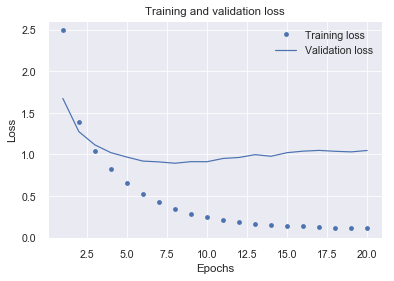

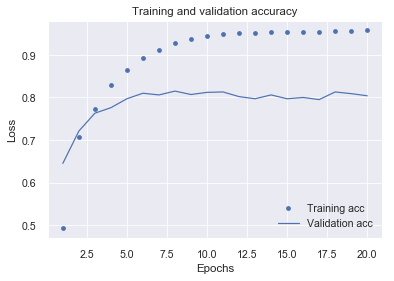

In [18]:
# plot training and valication loss
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

# plot training and valication acc
plt.clf()                        

acc = history.history['acc']
val_acc = history.history['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [19]:
# stop after epoch 9 to avoid overfitting
# retrain with full model
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(partial_x_train,
          partial_y_train,
          epochs=9,
          batch_size=512,
          validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)

Train on 7982 samples, validate on 1000 samples
Epoch 1/9


 512/7982 [>.............................] - ETA: 4s - loss: 3.8100 - acc: 0.0156

1024/7982 [==>...........................] - ETA: 2s - loss: 3.6993 - acc: 0.1865

1536/7982 [====>.........................] - ETA: 1s - loss: 3.5709 - acc: 0.2689

2048/7982 [======>.......................] - ETA: 1s - loss: 3.4542 - acc: 0.3159

2560/7982 [========>.....................] - ETA: 1s - loss: 3.3457 - acc: 0.3504

3072/7982 [==========>...................] - ETA: 1s - loss: 3.2439 - acc: 0.3783

3584/7982 [============>.................] - ETA: 0s - loss: 3.1491 - acc: 0.4043

4096/7982 [==============>...............] - ETA: 0s - loss: 3.0523 - acc: 0.4246

4608/7982 [================>.............] - ETA: 0s - loss: 2.9714 - acc: 0.4395

5120/7982 [==================>...........] - ETA: 0s - loss: 2.8907 - acc: 0.4549

5632/7982 [====================>.........] - ETA: 0s - loss: 2.8052 - acc: 0.4730

6144/7982 [======================>.......] - ETA: 0s - loss: 2.7393 - acc: 0.4876

6656/7982 [========================>.....] - ETA: 0s - loss: 2.6773 - acc: 0.4994

7168/7982 [=========================>....] - ETA: 0s - loss: 2.6209 - acc: 0.5098

7680/7982 [===========================>..] - ETA: 0s - loss: 2.5709 - acc: 0.5174

7982/7982 [==============================] - 2s 195us/step - loss: 2.5398 - acc: 0.5226 - val_loss: 1.6733 - val_acc: 0.6570


Epoch 2/9


 512/7982 [>.............................] - ETA: 1s - loss: 1.6682 - acc: 0.6621

1024/7982 [==>...........................] - ETA: 0s - loss: 1.6442 - acc: 0.6582

1536/7982 [====>.........................] - ETA: 0s - loss: 1.5817 - acc: 0.6764

2048/7982 [======>.......................] - ETA: 0s - loss: 1.5561 - acc: 0.6782

2560/7982 [========>.....................] - ETA: 0s - loss: 1.5246 - acc: 0.6824

3072/7982 [==========>...................] - ETA: 0s - loss: 1.4873 - acc: 0.6911

3584/7982 [============>.................] - ETA: 0s - loss: 1.4741 - acc: 0.6925

4096/7982 [==============>...............] - ETA: 0s - loss: 1.4606 - acc: 0.6956

4608/7982 [================>.............] - ETA: 0s - loss: 1.4416 - acc: 0.6977

5120/7982 [==================>...........] - ETA: 0s - loss: 1.4265 - acc: 0.7006

5632/7982 [====================>.........] - ETA: 0s - loss: 1.4159 - acc: 0.7024

6144/7982 [======================>.......] - ETA: 0s - loss: 1.4154 - acc: 0.7035

6656/7982 [========================>.....] - ETA: 0s - loss: 1.3974 - acc: 0.7072

7168/7982 [=========================>....] - ETA: 0s - loss: 1.3903 - acc: 0.7083

7680/7982 [===========================>..] - ETA: 0s - loss: 1.3781 - acc: 0.7108

7982/7982 [==============================] - 1s 157us/step - loss: 1.3712 - acc: 0.7121 - val_loss: 1.2758 - val_acc: 0.7210


Epoch 3/9


 512/7982 [>.............................] - ETA: 1s - loss: 1.0271 - acc: 0.7793

1024/7982 [==>...........................] - ETA: 1s - loss: 1.0284 - acc: 0.7803

1536/7982 [====>.........................] - ETA: 0s - loss: 1.0714 - acc: 0.7793

2048/7982 [======>.......................] - ETA: 0s - loss: 1.0885 - acc: 0.7729

2560/7982 [========>.....................] - ETA: 0s - loss: 1.0852 - acc: 0.7707

3072/7982 [==========>...................] - ETA: 0s - loss: 1.0653 - acc: 0.7728

3584/7982 [============>.................] - ETA: 0s - loss: 1.0538 - acc: 0.7762

4096/7982 [==============>...............] - ETA: 0s - loss: 1.0567 - acc: 0.7747

4608/7982 [================>.............] - ETA: 0s - loss: 1.0448 - acc: 0.7765

5120/7982 [==================>...........] - ETA: 0s - loss: 1.0310 - acc: 0.7783

5632/7982 [====================>.........] - ETA: 0s - loss: 1.0234 - acc: 0.7791

6144/7982 [======================>.......] - ETA: 0s - loss: 1.0250 - acc: 0.7770

6656/7982 [========================>.....] - ETA: 0s - loss: 1.0216 - acc: 0.7767

7168/7982 [=========================>....] - ETA: 0s - loss: 1.0199 - acc: 0.7764

7680/7982 [===========================>..] - ETA: 0s - loss: 1.0140 - acc: 0.7780

7982/7982 [==============================] - 1s 154us/step - loss: 1.0136 - acc: 0.7781 - val_loss: 1.1303 - val_acc: 0.7530


Epoch 4/9


 512/7982 [>.............................] - ETA: 1s - loss: 0.8174 - acc: 0.8223

1024/7982 [==>...........................] - ETA: 0s - loss: 0.8332 - acc: 0.8164

1536/7982 [====>.........................] - ETA: 0s - loss: 0.8673 - acc: 0.8060

2048/7982 [======>.......................] - ETA: 0s - loss: 0.8557 - acc: 0.8101

2560/7982 [========>.....................] - ETA: 0s - loss: 0.8405 - acc: 0.8121

3072/7982 [==========>...................] - ETA: 0s - loss: 0.8379 - acc: 0.8122

3584/7982 [============>.................] - ETA: 0s - loss: 0.8292 - acc: 0.8195

4096/7982 [==============>...............] - ETA: 0s - loss: 0.8083 - acc: 0.8247

4608/7982 [================>.............] - ETA: 0s - loss: 0.8037 - acc: 0.8240

5120/7982 [==================>...........] - ETA: 0s - loss: 0.8060 - acc: 0.8221

5632/7982 [====================>.........] - ETA: 0s - loss: 0.7934 - acc: 0.8253

6144/7982 [======================>.......] - ETA: 0s - loss: 0.7944 - acc: 0.8262

6656/7982 [========================>.....] - ETA: 0s - loss: 0.8007 - acc: 0.8248

7168/7982 [=========================>....] - ETA: 0s - loss: 0.8026 - acc: 0.8241

7680/7982 [===========================>..] - ETA: 0s - loss: 0.7937 - acc: 0.8260

7982/7982 [==============================] - 1s 153us/step - loss: 0.7976 - acc: 0.8251 - val_loss: 1.0539 - val_acc: 0.7590


Epoch 5/9


 512/7982 [>.............................] - ETA: 1s - loss: 0.6866 - acc: 0.8633

1024/7982 [==>...........................] - ETA: 0s - loss: 0.6535 - acc: 0.8623

1536/7982 [====>.........................] - ETA: 0s - loss: 0.6584 - acc: 0.8587

2048/7982 [======>.......................] - ETA: 0s - loss: 0.6549 - acc: 0.8579

2560/7982 [========>.....................] - ETA: 0s - loss: 0.6621 - acc: 0.8539

3072/7982 [==========>...................] - ETA: 0s - loss: 0.6599 - acc: 0.8558

3584/7982 [============>.................] - ETA: 0s - loss: 0.6529 - acc: 0.8569

4096/7982 [==============>...............] - ETA: 0s - loss: 0.6462 - acc: 0.8596

4608/7982 [================>.............] - ETA: 0s - loss: 0.6456 - acc: 0.8589

5120/7982 [==================>...........] - ETA: 0s - loss: 0.6477 - acc: 0.8605

5632/7982 [====================>.........] - ETA: 0s - loss: 0.6428 - acc: 0.8620

6144/7982 [======================>.......] - ETA: 0s - loss: 0.6494 - acc: 0.8597

6656/7982 [========================>.....] - ETA: 0s - loss: 0.6475 - acc: 0.8598

7168/7982 [=========================>....] - ETA: 0s - loss: 0.6392 - acc: 0.8626

7680/7982 [===========================>..] - ETA: 0s - loss: 0.6390 - acc: 0.8624

7982/7982 [==============================] - 1s 151us/step - loss: 0.6393 - acc: 0.8624 - val_loss: 0.9754 - val_acc: 0.7920


Epoch 6/9


 512/7982 [>.............................] - ETA: 1s - loss: 0.5607 - acc: 0.8828

1024/7982 [==>...........................] - ETA: 0s - loss: 0.5405 - acc: 0.8779

1536/7982 [====>.........................] - ETA: 0s - loss: 0.5463 - acc: 0.8841

2048/7982 [======>.......................] - ETA: 0s - loss: 0.5263 - acc: 0.8882

2560/7982 [========>.....................] - ETA: 0s - loss: 0.5240 - acc: 0.8879

3072/7982 [==========>...................] - ETA: 0s - loss: 0.5268 - acc: 0.8854

3584/7982 [============>.................] - ETA: 0s - loss: 0.5240 - acc: 0.8878

4096/7982 [==============>...............] - ETA: 0s - loss: 0.5188 - acc: 0.8904

4608/7982 [================>.............] - ETA: 0s - loss: 0.5228 - acc: 0.8893

5120/7982 [==================>...........] - ETA: 0s - loss: 0.5186 - acc: 0.8906

5632/7982 [====================>.........] - ETA: 0s - loss: 0.5182 - acc: 0.8903

6144/7982 [======================>.......] - ETA: 0s - loss: 0.5135 - acc: 0.8923

6656/7982 [========================>.....] - ETA: 0s - loss: 0.5114 - acc: 0.8921

7168/7982 [=========================>....] - ETA: 0s - loss: 0.5100 - acc: 0.8929

7680/7982 [===========================>..] - ETA: 0s - loss: 0.5151 - acc: 0.8917

7982/7982 [==============================] - 1s 154us/step - loss: 0.5124 - acc: 0.8923 - val_loss: 0.9102 - val_acc: 0.8140


Epoch 7/9


 512/7982 [>.............................] - ETA: 1s - loss: 0.3960 - acc: 0.9258

1024/7982 [==>...........................] - ETA: 1s - loss: 0.4010 - acc: 0.9170

1536/7982 [====>.........................] - ETA: 0s - loss: 0.4024 - acc: 0.9173

2048/7982 [======>.......................] - ETA: 0s - loss: 0.4144 - acc: 0.9150

2560/7982 [========>.....................] - ETA: 0s - loss: 0.4060 - acc: 0.9164

3072/7982 [==========>...................] - ETA: 0s - loss: 0.4128 - acc: 0.9137

3584/7982 [============>.................] - ETA: 0s - loss: 0.4134 - acc: 0.9129

4096/7982 [==============>...............] - ETA: 0s - loss: 0.4115 - acc: 0.9124

4608/7982 [================>.............] - ETA: 0s - loss: 0.4105 - acc: 0.9132

5120/7982 [==================>...........] - ETA: 0s - loss: 0.4142 - acc: 0.9125

5632/7982 [====================>.........] - ETA: 0s - loss: 0.4153 - acc: 0.9128

6144/7982 [======================>.......] - ETA: 0s - loss: 0.4135 - acc: 0.9131

6656/7982 [========================>.....] - ETA: 0s - loss: 0.4143 - acc: 0.9138

7168/7982 [=========================>....] - ETA: 0s - loss: 0.4116 - acc: 0.9139

7680/7982 [===========================>..] - ETA: 0s - loss: 0.4125 - acc: 0.9138

7982/7982 [==============================] - 1s 151us/step - loss: 0.4123 - acc: 0.9137 - val_loss: 0.8932 - val_acc: 0.8210


Epoch 8/9


 512/7982 [>.............................] - ETA: 1s - loss: 0.3232 - acc: 0.9453

1024/7982 [==>...........................] - ETA: 0s - loss: 0.3043 - acc: 0.9424

1536/7982 [====>.........................] - ETA: 0s - loss: 0.3243 - acc: 0.9368

2048/7982 [======>.......................] - ETA: 0s - loss: 0.3246 - acc: 0.9360

2560/7982 [========>.....................] - ETA: 0s - loss: 0.3259 - acc: 0.9336

3072/7982 [==========>...................] - ETA: 0s - loss: 0.3309 - acc: 0.9329

3584/7982 [============>.................] - ETA: 0s - loss: 0.3271 - acc: 0.9353

4096/7982 [==============>...............] - ETA: 0s - loss: 0.3297 - acc: 0.9333

4608/7982 [================>.............] - ETA: 0s - loss: 0.3278 - acc: 0.9329

5120/7982 [==================>...........] - ETA: 0s - loss: 0.3347 - acc: 0.9301

5632/7982 [====================>.........] - ETA: 0s - loss: 0.3353 - acc: 0.9299

6144/7982 [======================>.......] - ETA: 0s - loss: 0.3337 - acc: 0.9305

6656/7982 [========================>.....] - ETA: 0s - loss: 0.3329 - acc: 0.9306

7168/7982 [=========================>....] - ETA: 0s - loss: 0.3358 - acc: 0.9290

7680/7982 [===========================>..] - ETA: 0s - loss: 0.3357 - acc: 0.9289

7982/7982 [==============================] - 1s 149us/step - loss: 0.3354 - acc: 0.9288 - val_loss: 0.8732 - val_acc: 0.8260


Epoch 9/9


 512/7982 [>.............................] - ETA: 1s - loss: 0.2801 - acc: 0.9473

1024/7982 [==>...........................] - ETA: 1s - loss: 0.2554 - acc: 0.9453

1536/7982 [====>.........................] - ETA: 0s - loss: 0.2594 - acc: 0.9453

2048/7982 [======>.......................] - ETA: 0s - loss: 0.2607 - acc: 0.9458

2560/7982 [========>.....................] - ETA: 0s - loss: 0.2616 - acc: 0.9445

3072/7982 [==========>...................] - ETA: 0s - loss: 0.2681 - acc: 0.9430

3584/7982 [============>.................] - ETA: 0s - loss: 0.2670 - acc: 0.9417

4096/7982 [==============>...............] - ETA: 0s - loss: 0.2723 - acc: 0.9397

4608/7982 [================>.............] - ETA: 0s - loss: 0.2727 - acc: 0.9390

5120/7982 [==================>...........] - ETA: 0s - loss: 0.2749 - acc: 0.9371

5632/7982 [====================>.........] - ETA: 0s - loss: 0.2745 - acc: 0.9379

6144/7982 [======================>.......] - ETA: 0s - loss: 0.2737 - acc: 0.9378

6656/7982 [========================>.....] - ETA: 0s - loss: 0.2754 - acc: 0.9373

7168/7982 [=========================>....] - ETA: 0s - loss: 0.2759 - acc: 0.9376

7680/7982 [===========================>..] - ETA: 0s - loss: 0.2779 - acc: 0.9372

7982/7982 [==============================] - 1s 151us/step - loss: 0.2782 - acc: 0.9371 - val_loss: 0.9337 - val_acc: 0.8010


  32/2246 [..............................] - ETA: 0s

 320/2246 [===>..........................] - ETA: 0s

 608/2246 [=======>......................] - ETA: 0s

 896/2246 [==========>...................] - ETA: 0s

1184/2246 [==============>...............] - ETA: 0s

1472/2246 [==================>...........] - ETA: 0s

1760/2246 [======================>.......] - ETA: 0s

2048/2246 [==========================>...] - ETA: 0s

2246/2246 [==============================] - 0s 186us/step


In [20]:
results # acc 77.5%

[1.022207977935234, 0.7756010686194165]

In [21]:
# Generating predictions on new data
predictions = model.predict(x_test)

In [23]:
# Each entry in predictions is a vector of length 46:
predictions[0].shape

(46,)

In [24]:
# The coefficients in this vector sum to 1:
sum(predictions[0])

0.9999998168461843

In [25]:
# The largest entry is the predicted class—the class 
# with the highest probability:
np.argmax(predictions[0])

3

In [ ]:
# Encoding the labels as integers and 
# using the sparse_categorical_-crossentropy loss function
# y_train = np.array(train_labels)
# y_test = np.array(test_labels)
# 
# model.compile(optimizer='rmsprop',
#               loss='sparse_categorical_crossentropy',
#               metrics=['acc'])